In [1]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [2]:
# see notebook acf_trend_and_seasonal.ipynb for step-by-step data clensing

flights['day'] = '01'
flights['year'] = flights['year'].astype(str)
flights['date'] = flights[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1)
flights = flights.set_index( pd.to_datetime( flights['date']) )
flights.head()

,year,month,passengers,day,date
date,,,,,
1949-01-01,1949,January,112,01,1949-January-01
1949-02-01,1949,February,118,01,1949-February-01
1949-03-01,1949,March,132,01,1949-March-01
1949-04-01,1949,April,129,01,1949-April-01
1949-05-01,1949,May,121,01,1949-May-01


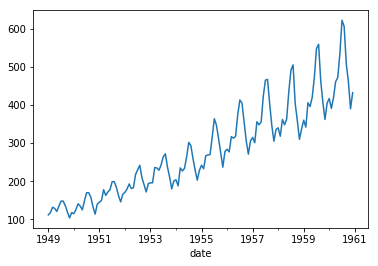

In [3]:
_ = flights['passengers'].plot()

### log transform

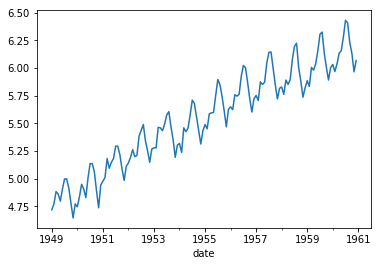

In [4]:
_ = np.log(flights['passengers']).plot()

### sqrt transform

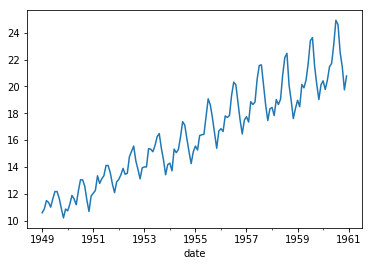

In [5]:
_ = np.sqrt(flights['passengers']).plot()

### power transforms

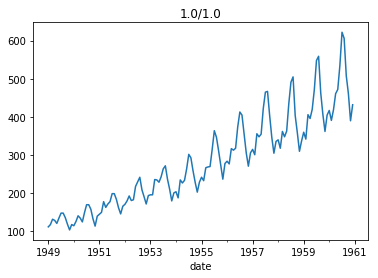

In [6]:
_ = np.power(flights['passengers'], 1.0/1.0).plot(title='1.0/1.0')

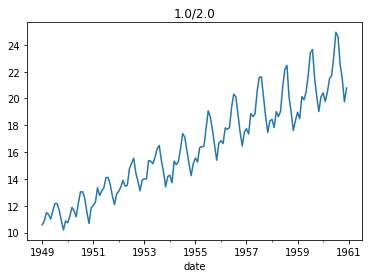

In [7]:
_ = np.power(flights['passengers'], 1.0/2.0).plot(title='1.0/2.0')

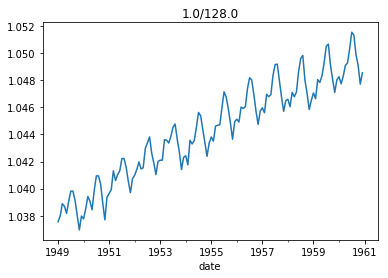

In [8]:
_ = np.power(flights['passengers'], 1.0/128.0).plot(title='1.0/128.0')

**Note:** It may not always be possible to find a transformation to be ok for the additive model.

### Box-Cox transform

In [9]:
from scipy.stats import boxcox
transformed, lmbda = boxcox(flights['passengers']) # let scipy select best lambda value
lmbda

0.14802256545004658

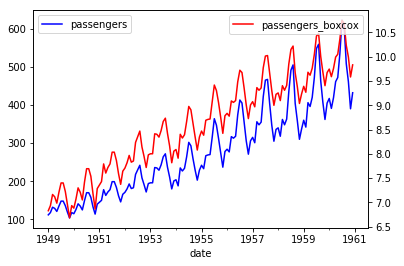

In [10]:
flights['passengers_boxcox'] = transformed
ax = flights['passengers'].plot(color='blue', legend=True)
ax2 = ax.twinx()
_ = flights['passengers_boxcox'].plot(ax=ax2, color='red', legend=True)
_ = ax2.legend(loc=1)

Notice how the seasonal variation above is similar across whole series with Box-Cox tranform

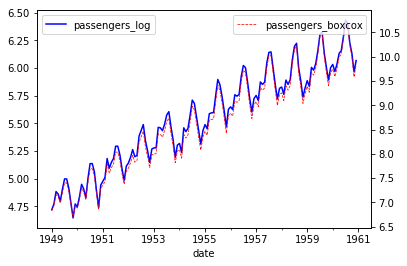

In [11]:
flights['passengers_log'] = np.log(flights['passengers'])

ax = flights['passengers_log'].plot(color='blue', legend=True)
ax2 = ax.twinx()
_ = flights['passengers_boxcox'].plot(ax=ax2, color='red', linestyle='--', linewidth=0.75, legend=True)
_ = ax2.legend(loc=1)

Notice how above the boxcox transform is very close to the log transform